In [27]:
import os
import torch
from torchvision import datasets
import torchvision
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
from PIL import ImageFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True
plt.ion()

In [28]:
batch_size = 15
num_workers = 0

transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [118]:
#uncomment to split training and validation


# import os
# import random
# from shutil import copyfile
# from torchvision import transforms
# from PIL import Image
# from random import shuffle

# # Set the paths for your original dataset and the directories to store the training and validation sets
# original_dataset_path = "C:/Users/thend/Desktop/Pratik/Face_features/Dataset/Whole_data"
# train_dataset_path = "C:/Users/thend/Desktop/Pratik/Face_features/Dataset/Training"
# val_dataset_path = "C:/Users/thend/Desktop/Pratik/Face_features/Dataset/Validation"

# # Define the list of classes
# class_names = ["Acne", "dark_skintone", "light_skintone", "medium_skintone", "Pale_skintone", "Pigmentation", "Pore_Quality", "Wrinkled"]

# # Set the ratio for the training set (e.g., 80% training, 20% validation)
# train_ratio = 0.8

# # Define data augmentation transformations
# # data_transform = transforms.Compose([
# #     transforms.Resize(size=(256,256)),
# #     transforms.RandomResizedCrop(224),
# #     transforms.RandomHorizontalFlip(),
# #     transforms.RandomRotation(20),
# #     # transforms.Lambda(lambda x: x.convert("RGB")),  # Ensure images are RGB
# #     # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
# #     transforms.ToTensor(),
# #     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# # ])


# # Iterate through each class
# for class_name in class_names:
#     class_folder = os.path.join(original_dataset_path, class_name)

#     # Get all image files in the class folder
#     class_images = [image for image in os.listdir(class_folder) if image.endswith('.jpg') or image.endswith('.png') or image.endswith('.jpeg')]

#     # Split the images into training and validation sets
#     train_images, val_images = train_test_split(class_images, test_size=(1 - train_ratio), random_state=42)

#     # Create directories for the training and validation sets
#     train_class_folder = os.path.join(train_dataset_path, class_name)
#     val_class_folder = os.path.join(val_dataset_path, class_name)

#     os.makedirs(train_class_folder, exist_ok=True)
#     os.makedirs(val_class_folder, exist_ok=True)

#     # Copy images for the training set
#     for image_name in train_images:
#         source_path = os.path.join(class_folder, image_name)
#         destination_path = os.path.join(train_class_folder, image_name)
#         copyfile(source_path, destination_path)

#     # Copy images for the validation set
#     for image_name in val_images:
#         source_path = os.path.join(class_folder, image_name)
#         destination_path = os.path.join(val_class_folder, image_name)
#         copyfile(source_path, destination_path)

# print(class_names)


In [29]:
class_names = ["Acne", "dark_skintone", "light_skintone", "medium_skintone", "Pale_skintone", "Pigmentation", "Pore_Quality", "Wrinkled"]


data_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    # transforms.Lambda(lambda x: x.convert("RGB")),  # Ensure images are RGB
    transforms.ToTensor(),
    # transforms.Lambda(lambda x: x[:3, :, :]),  # Remove alpha channel if present
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print(class_names)


train_set = 'C:/Users/thend/Desktop/Pratik/Face_features/Dataset/Training'
valid_set = 'C:/Users/thend/Desktop/Pratik/Face_features/Dataset/Validation'

print(class_names)

train_data = datasets.ImageFolder(train_set, transform=data_transform)
valid_data = datasets.ImageFolder(valid_set, transform=data_transform)



['Acne', 'dark_skintone', 'light_skintone', 'medium_skintone', 'Pale_skintone', 'Pigmentation', 'Pore_Quality', 'Wrinkled']
['Acne', 'dark_skintone', 'light_skintone', 'medium_skintone', 'Pale_skintone', 'Pigmentation', 'Pore_Quality', 'Wrinkled']


In [31]:

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

print(class_names)

loaders = {
    'train': train_loader,
    'valid': valid_loader
}

['Acne', 'dark_skintone', 'light_skintone', 'medium_skintone', 'Pale_skintone', 'Pigmentation', 'Pore_Quality', 'Wrinkled']


In [32]:
# img, lab = next(iter(train_loader))
# print(set(lab))

{tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(1), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4)}


In [33]:
# for batch in train_loader:
#     # 'batch' is a dictionary or a list, depending on your dataset
#     print(batch[0], batch[1])
#     break

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

In [35]:
# labels = []
# for batch in train_loader:
#     _, batch_labels = batch  # Assuming labels are in the second element of each batch
#     labels.extend(batch_labels.numpy())  # Assuming labels are in a torch tensor

# # Print unique labels
# unique_labels = set(labels)
# print("Unique Labels:", unique_labels)

Unique Labels: {0, 1, 2, 3, 4, 5, 6, 7}


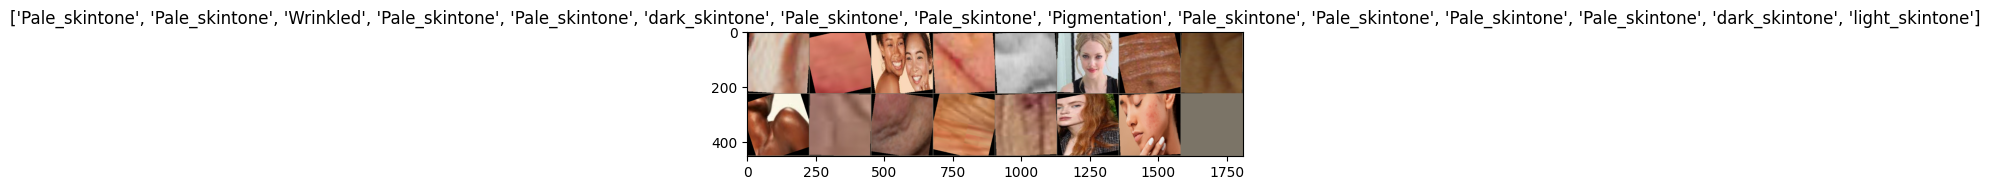

In [45]:
# print(class_names)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
# inputs, classes = next(iter(loaders['train']))

for batch in train_loader:
    inputs, classes = batch  # Assuming labels are in the second element of each batch
    break
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# print(out)

imshow(out, title=[class_names[x] for x in classes])

In [38]:
model = models.resnet50(pretrained=True)


c:\Users\thend\.conda\envs\torch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thend\.conda\envs\torch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Sequential(torch.nn.Linear(2048,128),
                                      torch.nn.ReLU(),
                                       torch.nn.Linear(128,8), #Linear(128,8 since we have 8 classes)
                                       torch.nn.Softmax()
                                      )

for param in model.fc.parameters():
    param.requires_grad = True
    
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [40]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.0005)


In [41]:
n_epochs = 20

train_accuracy_list = []
train_loss_list = []
valid_accuracy_list = []
valid_loss_list = []

def train(n_epochs, loader, model, optimizer, criterion, save_path):
    
    valid_loss_min = np.Inf
       
    for epoch in range(1, (n_epochs+1)):
        
        train_loss = 0.0
        valid_loss = 0.0
        train_acc = 0.0
        valid_acc = 0.0
        
        model.train()
        
        for batch_idx, (data, target) in enumerate(loaders['train']):

            optimizer.zero_grad()
            output = model(data)
            _, preds = torch.max(output, 1)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_acc = train_acc + torch.sum(preds == target.data)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):

            output = model(data)
            _, preds = torch.max(output, 1)
            loss = criterion(output, target)
            
            valid_acc = valid_acc + torch.sum(preds == target.data)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        train_acc = train_acc/len(loaders['train'].dataset)
        valid_acc = valid_acc/len(loaders['valid'].dataset)
        
        train_accuracy_list.append(train_acc)
        train_loss_list.append(train_loss)
        valid_accuracy_list.append(valid_acc)
        valid_loss_list.append(valid_loss)
        
        print('Epoch: {} \tTraining Acc: {:6f} \tTraining Loss: {:6f} \tValidation Acc: {:6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            train_acc,
            train_loss,
            valid_acc,
            valid_loss
            ))

        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
            
    return model

In [42]:
model = train(n_epochs, loaders, model, optimizer, criterion, 'C:/Users/thend/Desktop/Pratik/Face_features/Models/testing1.pt')


c:\Users\thend\.conda\envs\torch\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1 	Training Acc: 0.765464 	Training Loss: 0.004015 	Validation Acc: 0.754902 	Validation Loss: 0.014872
Validation loss decreased (inf --> 0.014872).  Saving model ...
Epoch: 2 	Training Acc: 0.783505 	Training Loss: 0.003841 	Validation Acc: 0.754902 	Validation Loss: 0.014871
Validation loss decreased (0.014872 --> 0.014871).  Saving model ...
Epoch: 3 	Training Acc: 0.783505 	Training Loss: 0.003840 	Validation Acc: 0.754902 	Validation Loss: 0.014941
Epoch: 4 	Training Acc: 0.783505 	Training Loss: 0.003842 	Validation Acc: 0.754902 	Validation Loss: 0.014965
Epoch: 5 	Training Acc: 0.783505 	Training Loss: 0.003841 	Validation Acc: 0.754902 	Validation Loss: 0.014896
Epoch: 6 	Training Acc: 0.783505 	Training Loss: 0.003842 	Validation Acc: 0.754902 	Validation Loss: 0.014871
Validation loss decreased (0.014871 --> 0.014871).  Saving model ...
Epoch: 7 	Training Acc: 0.783505 	Training Loss: 0.003843 	Validation Acc: 0.754902 	Validation Loss: 0.014895
Epoch: 8 	Training Ac

KeyboardInterrupt: 

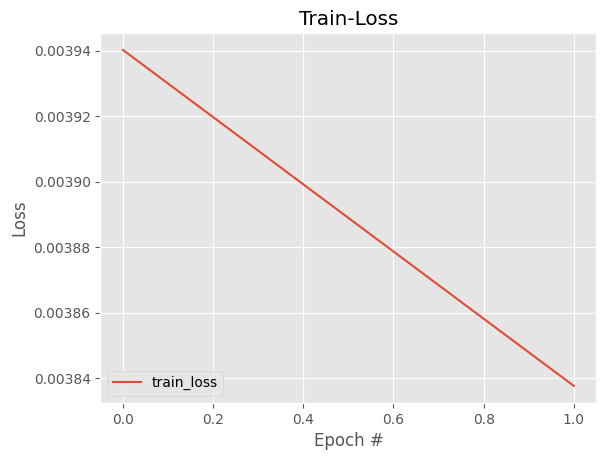

In [98]:
plt.style.use("ggplot")
plt.figure()
plt.plot(train_loss_list, label="train_loss")
plt.title("Train-Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

Train Accuracy mean:  tensor(0.7699)
Valid Accuracy mean:  tensor(0.7549)


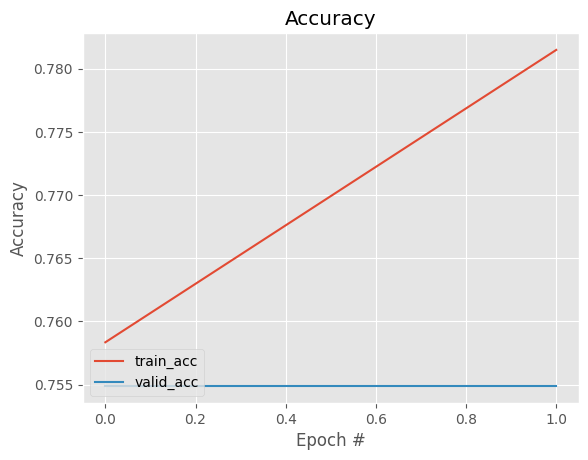

In [99]:
plt.style.use("ggplot")
plt.figure()

train_acc_list = [tensor.item() for tensor in train_accuracy_list]
valid_acc_list = [tensor.item() for tensor in valid_accuracy_list]

mean_accuracy_train = torch.tensor(train_accuracy_list)
mean_accuracy_train = mean_accuracy_train.mean()
print("Train Accuracy mean: ", mean_accuracy_train)
mean_accuracy_valid = torch.tensor(valid_accuracy_list)
mean_accuracy_valid = mean_accuracy_valid.mean()
print("Valid Accuracy mean: ", mean_accuracy_valid)


plt.plot(train_accuracy_list, label="train_acc")
plt.plot(valid_accuracy_list, label="valid_acc")

plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [100]:
def predict(image, model_path):
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)

    model.load_state_dict(torch.load(model_path), strict = False)
    model.eval()

    pred = model(image)
    idx = torch.argmax(pred)
    prob = pred[0][idx].item()*100
    
    return class_names[idx], prob

Results from Model:  C:/Users/thend/Desktop/Pratik/Face_features/Models/testing1.pt


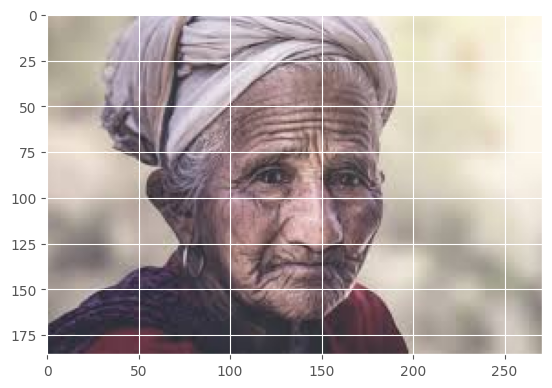

Pale_skintone 99.99994039535522


c:\Users\thend\.conda\envs\torch\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [101]:
from PIL import Image

def test(testing_image_path, model_path):
    print("Results from Model: ", str(model_path))

    img = Image.open(testing_image_path)
    plt.imshow(img)
    plt.show()

    prediction, prob = predict(image=img, model_path=model_path)
    print(prediction, prob)


test(testing_image_path= "C:/Users/thend/Desktop/Pratik/Face_features/Testing_Images/images.jpeg", model_path="C:/Users/thend/Desktop/Pratik/Face_features/Models/testing1.pt")